# Image recognition with Support Vector Machine 

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
faces = fetch_olivetti_faces()

In [3]:
print faces.DESCR

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [4]:
print faces.keys()

['images', 'data', 'target', 'DESCR']


In [5]:
print faces.images.shape

(400, 64, 64)


In [6]:
print faces.data.shape

(400, 4096)


In [7]:
print faces.target.shape

(400,)


Our data is normalized!

In [8]:
print np.max(faces.data)

1.0


In [9]:
print np.min(faces.data)

0.0


In [10]:
print np.mean(faces.data)

0.547043


**Helper function**

In [11]:
def print_image(images, targets, top_n):
    '''Print pictures that are top num'''
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    for i in xrange(top_n):
        p = fig.add_subplot(20,20,i+1,xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0,14, str(targets[i]))
        p.text(0,60,str(i))
        

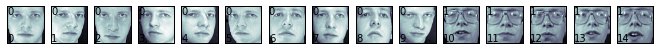

In [12]:
print_image(faces.images, faces.target, 15)

## Training SVM

In [13]:
from sklearn.svm import SVC ##Support Machine Classifier

The SVC will be used for classfication.

In [14]:
svc_1 = SVC(kernel='linear')

Split dataset into training and testing datasets

In [15]:
from sklearn.cross_validation import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,test_size=0.25, random_state=0)

Cross validation

In [17]:
from sklearn.cross_validation import KFold, cross_val_score

In [18]:
from scipy.stats import sem

In [19]:
def evaluate_crossvalidation(clf, X, y, K):
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    scores = cross_val_score(clf, X, y, cv=cv)
    print scores
    print ("Mean score:{0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))

In [20]:
evaluate_crossvalidation(svc_1, X_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score:0.913 (+/- 0.012)


Training on the training set and evaluate performance on the testing data

In [21]:
from sklearn import metrics

In [22]:
def train_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    print "Classfication Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion matrix:"
    print metrics.confusion_matrix(y_test, y_pred)
    

In [23]:
train_evaluate(svc_1, X_train, y_train, X_test, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classfication Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19     

**Try to classify the faces with or without glasses**

In [24]:
glasses = [
    (10,19),(30,32),(37,38),(50,59),(63,64),
    (69,69),(120,121),(124,129),(130,139),(160,161),
    (164,169),(180,182),(185,185),(189,189),(190,192),
    (194,194),(196,199),(260,269),(270,279),(300,309),
    (330,339),(358,359),(360,369)
    
]

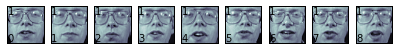

In [25]:
print_image(faces.images[10:],faces.target[10:],9)

Create a new target that marks 1 for with glass 0 for without glass

In [26]:
def create_target(segment):
    y = np.zeros(faces.target.shape[0])
    for (start, end) in segment:
        y[start:end+1] = 1
    return y

In [27]:
target_glasses = create_target(glasses)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_glasses, test_size=0.25, random_state=0)

In [29]:
svc_2 = SVC(kernel='linear')

In [30]:
evaluate_crossvalidation(svc_2, X_train, y_train, 5)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]
Mean score:0.970 (+/- 0.012)


In [31]:
train_evaluate(svc_2, X_train, y_train, X_test, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classfication Report:
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

Confusion matrix:
[[66  1]
 [ 0 33]]


In [32]:
X_test = faces.data[30:40]

In [33]:
y_test = target_glasses[30:40]

In [34]:
print y_test.shape[0]

10


In [35]:
select = np.ones(target_glasses.shape[0])

In [36]:
select[30:40] = 0

In [37]:
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

In [38]:
print y_train.shape[0]

390


In [39]:
svc_3 = SVC(kernel="linear")

In [40]:
train_evaluate(svc_3, X_train, y_train, X_test, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classfication Report:
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

Confusion matrix:
[[5 0]
 [1 4]]


In [41]:
y_pred = svc_3.predict(X_test)

In [42]:
images = [np.reshape(each , (64,64)) for each in X_test]

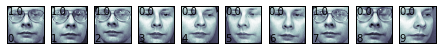

In [43]:
print_image(images, y_pred, 10)